Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

Carrefando bibliotecas a serem utilizadas na análise e definindo paramentros fixos

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fonte_titulo_grafico = {"size":34}

query_70 = "Ano <= 1979"
query_80 = "Ano >= 1980 & Ano < 1990"
query_90 = "Ano >= 1990 & Ano < 2000"
query_00 = "Ano >= 2000 & Ano < 2010"
query_10 = "Ano >= 2010"



## Análise dos dados:


Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

# Pra iniciar a análise da base de dados irei carregar o total de óbitos por ano e identificar quais anos teve um número fora da curva e tentar relacionar com eventos que acontecerem nesses anos.




In [98]:
fonte = "../dados/obitos-registro-civil.csv"

dados_original = pd.read_csv(fonte)

dados_original.rename(columns = {"year":"Ano","month":"Mês","state":"Estado","deaths":"Mortes"},inplace = True)
dados_original.query("Ano == '2020'")


,Ano,Mês,Estado,Mortes
14814,2020,1,AC,373
14815,2020,1,AL,1588
14816,2020,1,AP,283
14817,2020,1,AM,1337
14818,2020,1,BA,6854
...,...,...,...,...
15025,2020,8,RR,86
15026,2020,8,SC,4666
15027,2020,8,SP,31782
15028,2020,8,SE,1452


Retirei o ano 2020 para a esta análise inicial por não estar completo.

In [99]:
dados_original_sem_2020 = dados_original.query("Ano != 2020")
dados_original_sem_2020

,Ano,Mês,Estado,Mortes
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65
...,...,...,...,...
14809,2019,12,RR,186
14810,2019,12,SC,3157
14811,2019,12,SP,22863
14812,2019,12,SE,1031


In [100]:
mortes_por_ano = dados_original_sem_2020[["Ano","Mortes"]].groupby("Ano").sum()
mortes_por_ano.head()

,Mortes
Ano,
1970,272214
1971,281565
1972,288090
1973,316849
1974,316573


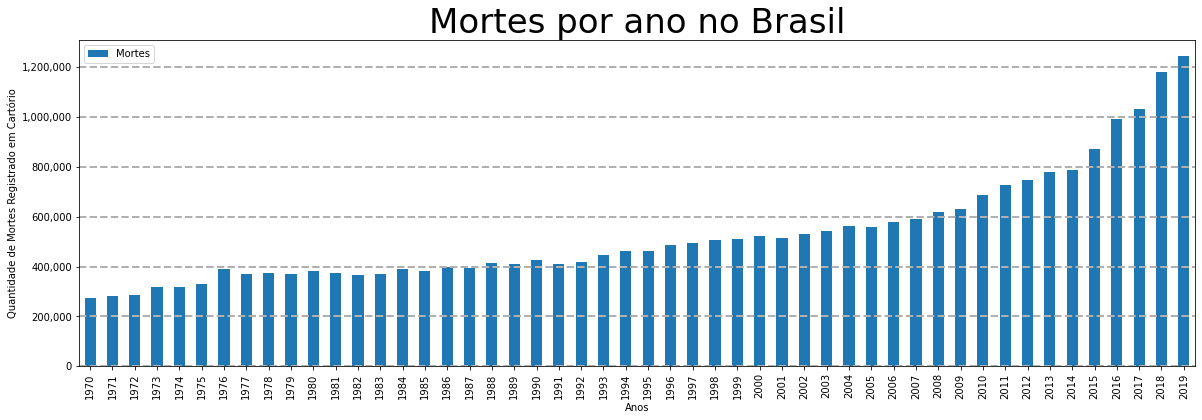

In [101]:


ax = mortes_por_ano.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_title("Mortes por ano no Brasil",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()



# Podemos observar no gráfico que os anos que se detacam com um maior variação do número de mortes são 1976,2016,2018. 
# Não consegui relacionar com nenhum tipo evento de saúde publica que aconteceu no Brasil nesses anos que destaram até o momento.

# Apartir daqui vou separar os dados por década para tentar identificar alguma variação dicrepante e tentar responder o motivo do crescimento de mortes ao longos dos anos



In [102]:
mortes_por_decada_70 = mortes_por_ano.query(query_70)
mortes_por_decada_80 = mortes_por_ano.query(query_80)
mortes_por_decada_90 = mortes_por_ano.query(query_90)
mortes_por_decada_00 = mortes_por_ano.query(query_00)
mortes_por_decada_10 = mortes_por_ano.query(query_10)

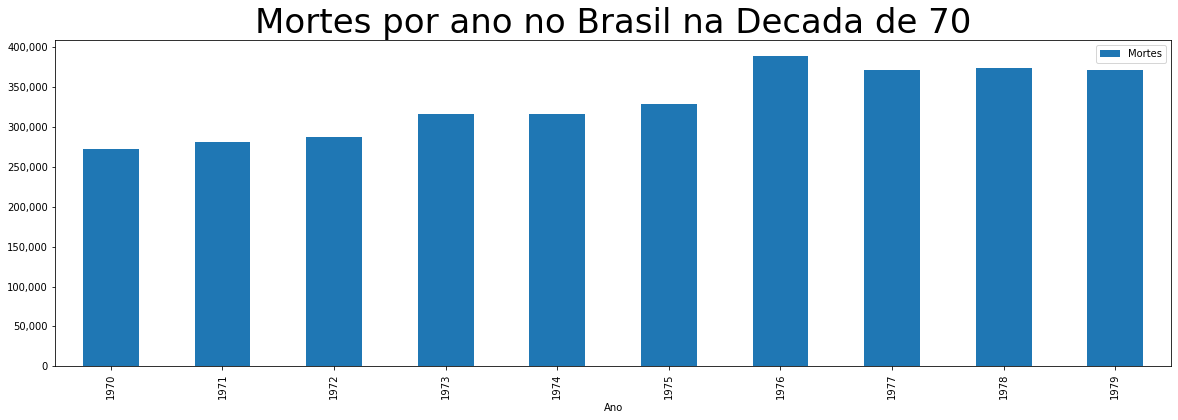

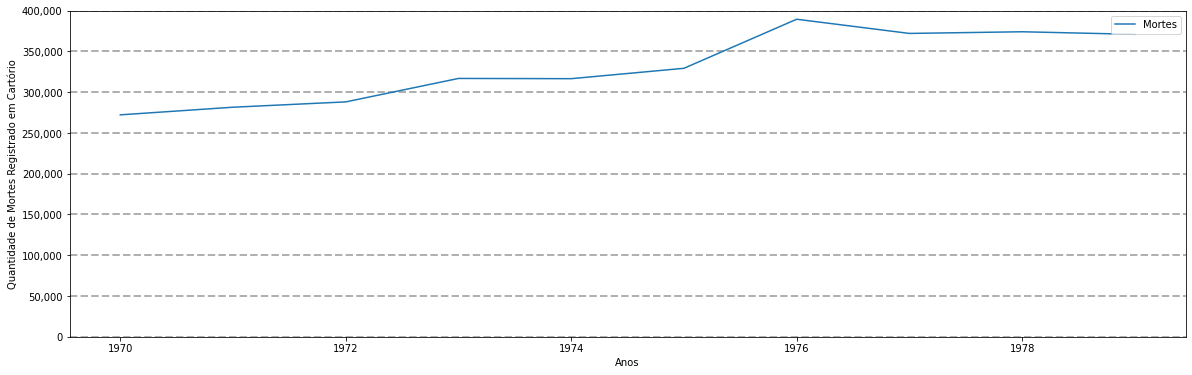

In [103]:
ax = mortes_por_decada_70.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_70.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,400000)

ax.set_title("Mortes por ano no Brasil na Decada de 70",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)

plt.show()

# No grafico dos de 1970 a 1979 podemos observar e confirmar que realmente no ano de 1976 houve um saldo fora curva em realçao aos outros anos.
Em pesquisa indentifiquei que foi nesse ano que foi implantando o SIM - Sistema de Informações sobre Mortalidade.
 http://aprendis.gim.med.up.pt/index.php/Sistema_de_Informa%C3%A7%C3%A3o_sobre_Mortalidade#:~:text=O%20SIM%20foi%20criado%20pelo,de%20cerca%20de%20seis%20anos)

 Séra que com a implantação desse sistema contribui para esse aumento de notificação de mortes?

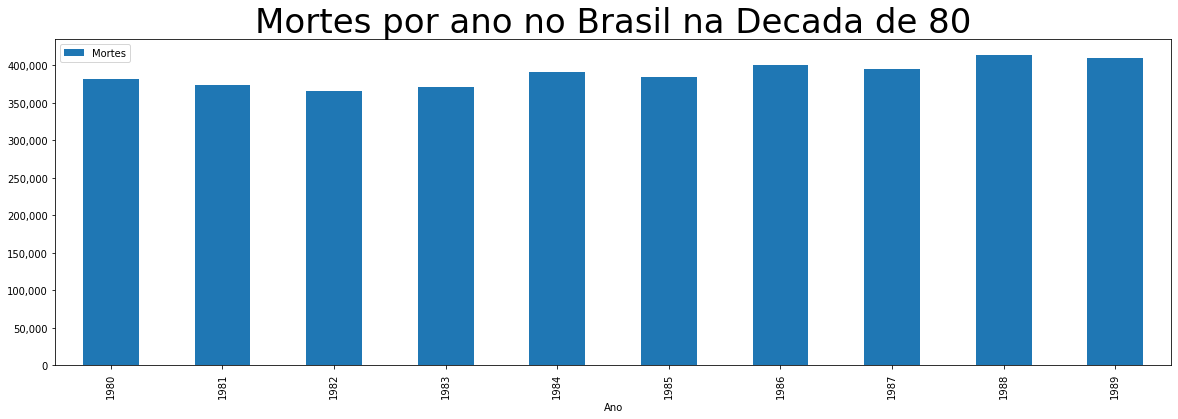

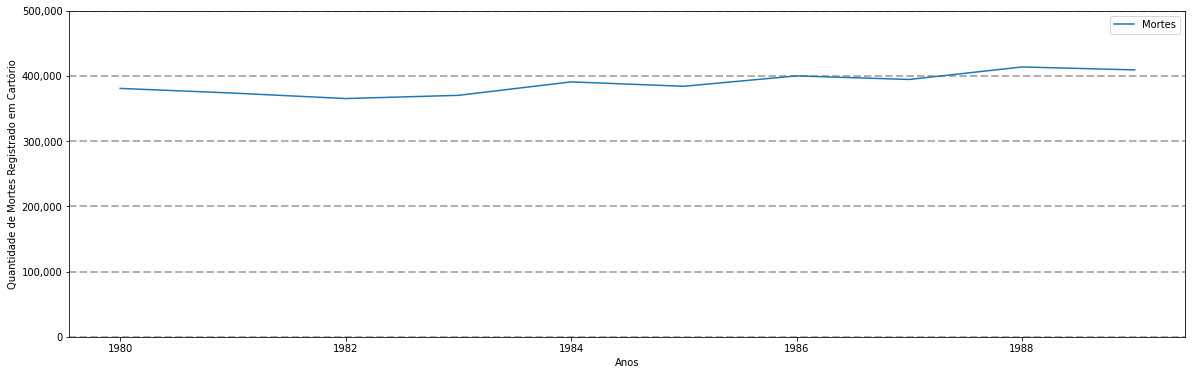

In [104]:
ax = mortes_por_decada_80.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_80.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,500000)

ax.set_title("Mortes por ano no Brasil na Decada de 80",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

# De 1980 até 1989 não identifique nehuma variação que se detaca.

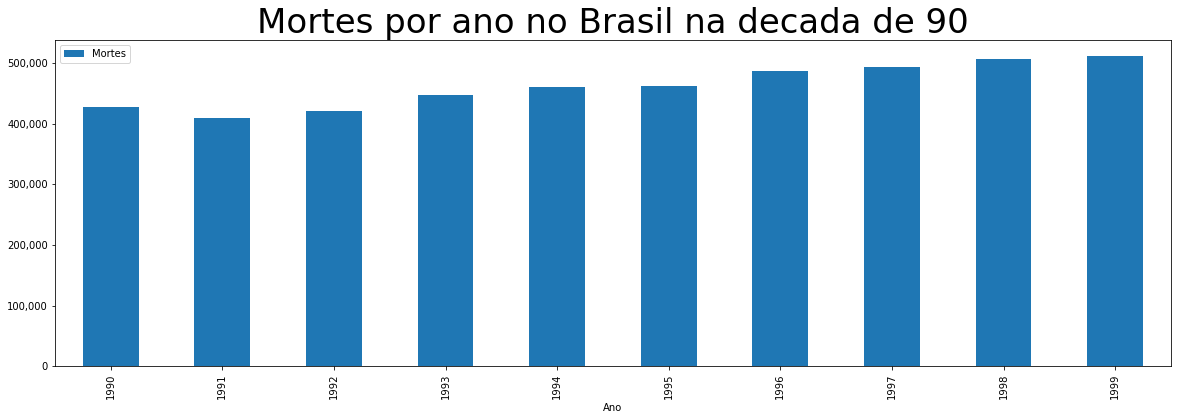

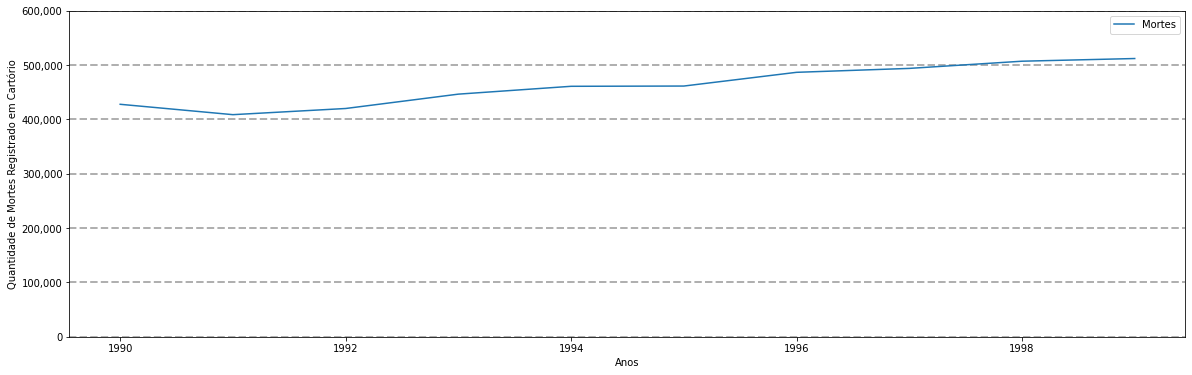

In [105]:
ax = mortes_por_decada_90.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_90.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,600000)

ax.set_title("Mortes por ano no Brasil na decada de 90",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

# De 1990 até 1999 identifiquei um crescimento linerar sem nehuma variação que se detaca.

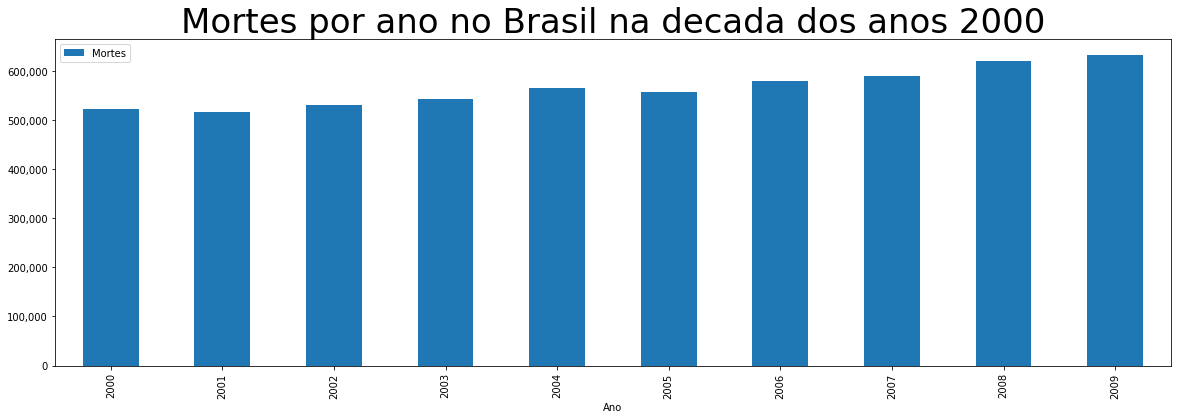

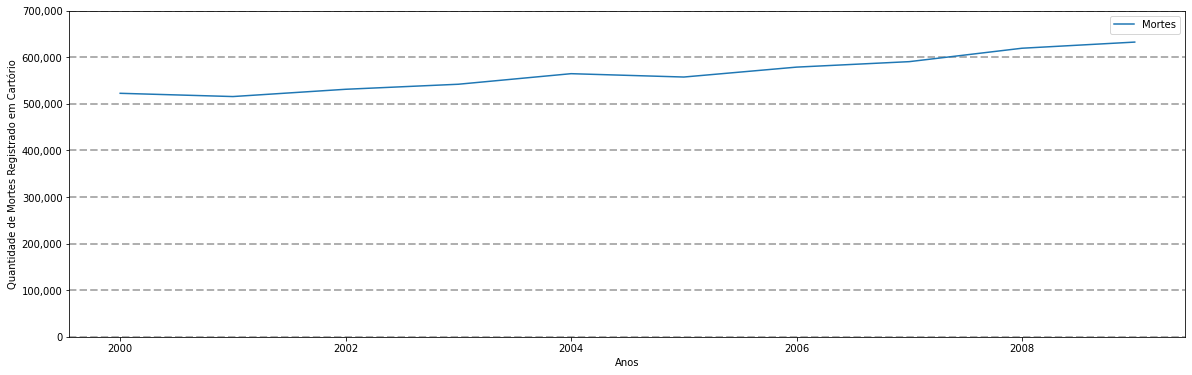

In [106]:
ax = mortes_por_decada_00.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_00.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,700000)

ax.set_title("Mortes por ano no Brasil na decada dos anos 2000",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

# De 2000 até 2009 também identifiquei um crescimento linear sem nehuma variação que se detaca.

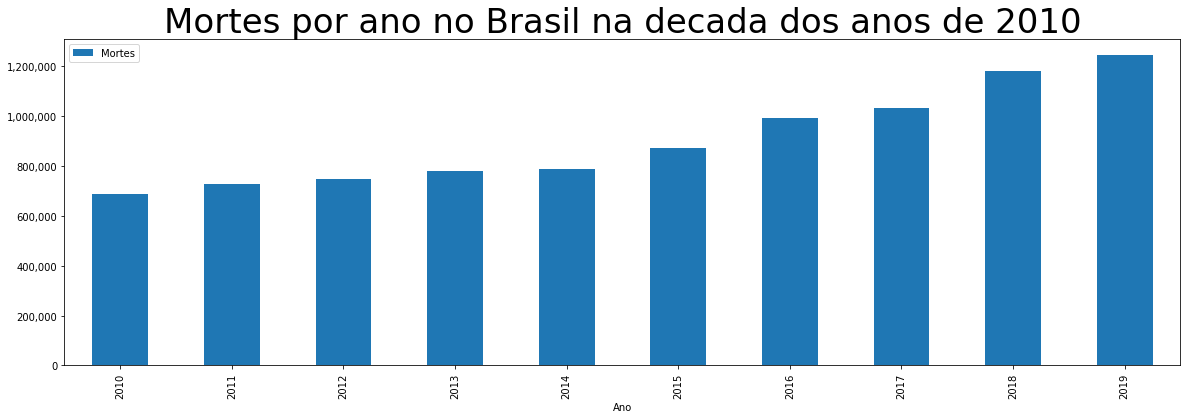

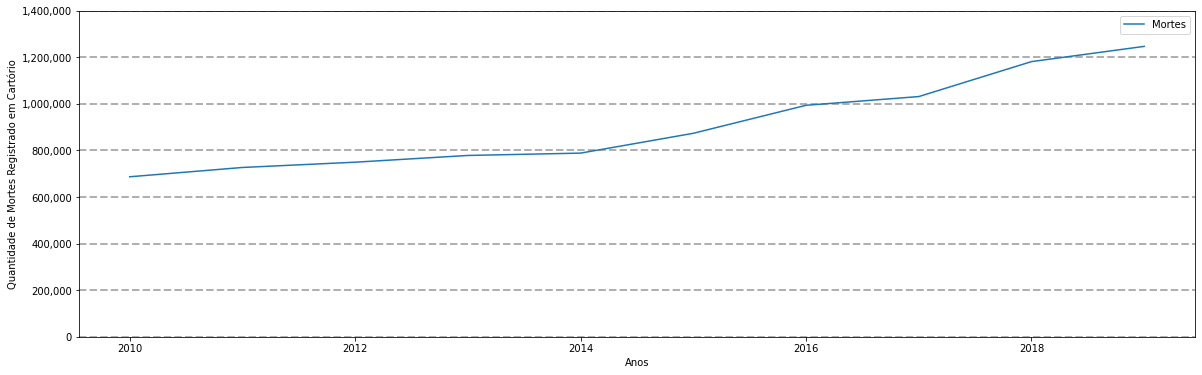

In [107]:
ax = mortes_por_decada_10.plot(kind="bar",figsize=(20,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax2 = mortes_por_decada_10.plot(kind="line",figsize=(20,6))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.ylim(0,1400000)

ax.set_title("Mortes por ano no Brasil na decada dos anos de 2010",fontdict=fonte_titulo_grafico)
plt.ylabel("Quantidade de Mortes Registrado em Cartório")
plt.xlabel("Anos")
plt.grid(True,axis="y",ls="--",linewidth=2)
plt.show()

# De 2010 até 2019 identifiquei um crescimento linear com um crescimento maior das outras decadas.



# Para demonstrar de uma melhor forma a varição entre as decadas irei plotar boxplot de todas as decadas

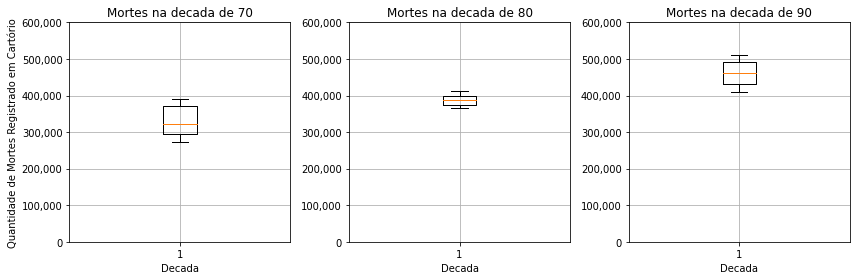

In [108]:

fig,ax =  plt.subplots(1,3,figsize = (12,4))

ax[0].boxplot(mortes_por_decada_70)
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].set_title("Mortes na decada de 70")
ax[0].grid(True)
ax[0].set_ylim(0,600000)
ax[0].set_xlabel("Decada")
ax[0].set_ylabel("Quantidade de Mortes Registrado em Cartório")

ax[1].boxplot(mortes_por_decada_80)
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[1].set_title("Mortes na decada de 80")
ax[1].grid(True)
ax[1].set_ylim(0,600000)
ax[1].set_xlabel("Decada")

ax[2].boxplot(mortes_por_decada_90)
ax[2].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[2].set_title("Mortes na decada de 90")
ax[2].grid(True)
ax[2].set_ylim(0,600000)
ax[2].set_xlabel("Decada")


fig.tight_layout()
plt.show()

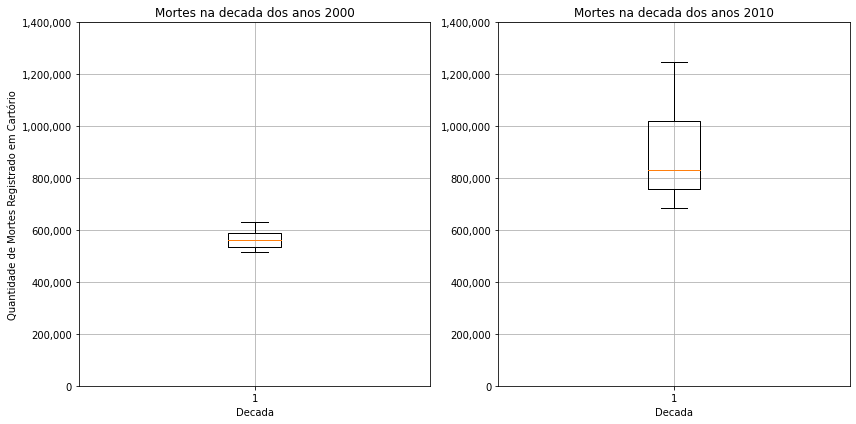

In [109]:
fig,ax =  plt.subplots(1,2,figsize = (12,6))

ax[0].boxplot(mortes_por_decada_00)
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[0].set_title("Mortes na decada dos anos 2000")
ax[0].grid(True)
ax[0].set_ylim(0,1400000)
ax[0].set_xlabel("Decada")
ax[0].set_ylabel("Quantidade de Mortes Registrado em Cartório")

ax[1].boxplot(mortes_por_decada_10)
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax[1].set_title("Mortes na decada dos anos 2010")
ax[1].grid(True)
ax[1].set_ylim(0,1400000)
ax[1].set_xlabel("Decada")


fig.tight_layout()
plt.show()

# Podemos visualizar que o período que se destaca com relação em maior variação entre os anos é o período de 2010 a 2019.
# Tal crescimento deve ao aumento da populaçao com idade avaçada?
# Qual outro motivo pode pode explicar esse aumento?

# Quantidade de mortes por estados de 1970 a 2019

In [110]:
total_mortes_por_estado = dados_original_sem_2020[["Estado","Mortes"]].groupby(["Estado"]).sum().sort_values("Mortes",ascending=False)
total_mortes_por_estado.head()

,Mortes
Estado,
SP,11226341
MG,4104171
PR,2579750
PE,2387868
RS,913149


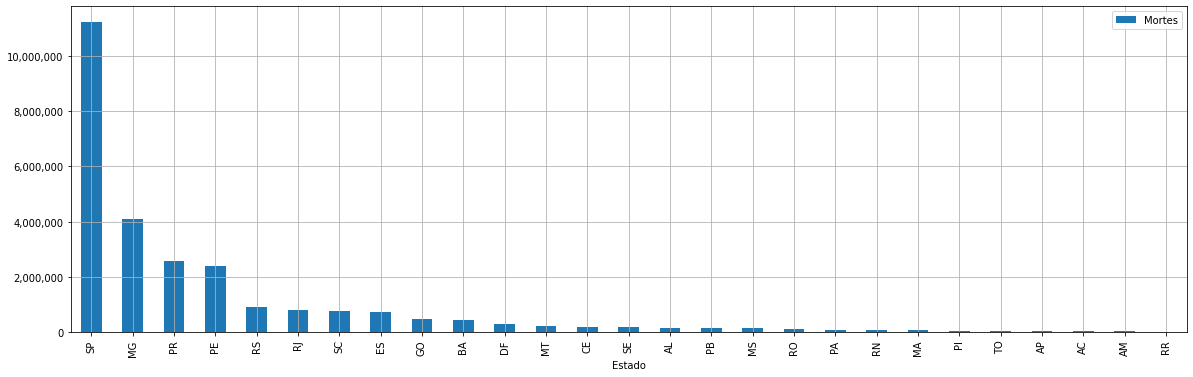

In [111]:
ax = total_mortes_por_estado.plot(kind="bar",figsize=(20,6),grid=True)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.show()

In [112]:
dados_mortes_sp_versus_outros_estados = dados_original_sem_2020.query("Estado != 'SP'")[["Ano","Mortes"]].groupby("Ano").sum()
dados_mortes_sp_versus_outros_estados["Mortes SP"] = dados_original_sem_2020.query("Estado == 'SP'")[["Ano","Mortes"]].groupby("Ano").sum()
dados_mortes_sp_versus_outros_estados.head()

,Mortes,Mortes SP
Ano,,
1970,109972,162242
1971,111753,169812
1972,112569,175521
1973,128113,188736
1974,123727,192846


<AxesSubplot:xlabel='Ano'>

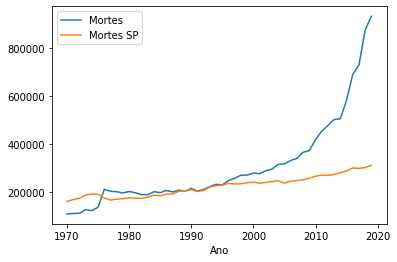

In [113]:
dados_mortes_sp_versus_outros_estados.plot()

In [114]:
dados_mortes_sp_versus_outros_estados.query(query_80)

,Mortes,Mortes SP
Ano,,
1980,203686,177093
1981,198134,175525
1982,190386,174838
1983,190151,180005
1984,202520,188245
1985,198590,185475
1986,207827,192123
1987,201568,192925
1988,209000,204669


<AxesSubplot:xlabel='Ano'>

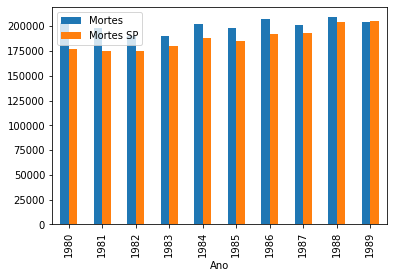

In [115]:
dados_mortes_sp_versus_outros_estados.query(query_80).plot(kind="bar")

In [116]:
total_mortes_por_estado_70 = dados_original_sem_2020.query(query_80)[["Estado","Mortes"]].groupby(["Estado"]).sum().sort_values("Mortes",ascending=False)
total_mortes_por_estado.head()

,Mortes
Estado,
SP,11226341
MG,4104171
PR,2579750
PE,2387868
RS,913149


In [120]:
dados_original_sem_2020[["Mês","Mortes"]].groupby("Mês").sum()

,Mortes
Mês,
1,1798.116599
2,1593.023712
3,1743.258246
4,1736.212541
5,1864.163415
6,1895.035570
7,2008.486156
8,1894.054972
9,1758.090177


<AxesSubplot:xlabel='Mês'>

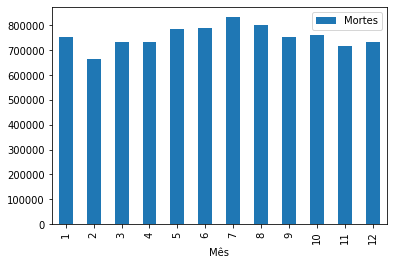

In [127]:
dados_original_sem_2020.query(query_10)[["Mês","Mortes"]].groupby("Mês").sum().plot(kind="bar")